In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dateutil.parser
import seaborn as sns
from IPython.display import Image
import os

In [61]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 20)
pd.set_option('display.precision', 3)

In [62]:
df_pluto = pd.read_pickle('../data/pkl/df_pluto-cat-feat-2016-2017.pkl')
# Drop categorical columns
df_pluto = df_pluto[df_pluto.columns.difference(['BldgClass','FireComp','IrrLotCode','Sanborn','SplitZone','ZoneDist1'])]
df_pluto = df_pluto[df_pluto.columns.difference(['APPBBL','AreaSource','BBL','BoroCode','CondoNo','TaxMap'])]
df_pluto = df_pluto[df_pluto.columns.difference(['new_bldg_prob','ZoneCodeChanged','ZoneCodeWasVacant'])]
# Drop rows with NANs
df_pluto = df_pluto.dropna()
df_pluto
# Group by block
#df_pluto = df_pluto.groupby('Block').median()
#1-sum(df_pluto['ZoneCodeChanged'])/len(df_pluto['ZoneCodeChanged'])

,AssessLand,AssessTot,BldgArea,BldgDepth,BldgFront,Block,BsmtCode,BuiltFAR,CB2010,CD_301,CD_302,CD_303,CD_304,CD_305,CD_306,CD_307,CD_308,CD_309,CD_310,CD_311,CD_312,CD_313,CD_314,CD_315,CD_316,CD_317,CD_318,CD_355,CD_356,CD_410,CT2010,ComArea,CommFAR,Council_33.0,Council_34.0,Council_35.0,Council_36.0,Council_37.0,Council_38.0,Council_39.0,Council_40.0,Council_41.0,Council_42.0,Council_43.0,Council_44.0,Council_45.0,Council_46.0,Council_47.0,Council_48.0,Easements,...,Tract2010,UnitsRes,UnitsTotal,XCoord,YCoord,YearAlter1,YearAlter2,YearBuilt,ZipCode_11201.0,ZipCode_11203.0,ZipCode_11204.0,ZipCode_11205.0,ZipCode_11206.0,ZipCode_11207.0,ZipCode_11208.0,ZipCode_11209.0,ZipCode_11210.0,ZipCode_11211.0,ZipCode_11212.0,ZipCode_11213.0,ZipCode_11214.0,ZipCode_11215.0,ZipCode_11216.0,ZipCode_11217.0,ZipCode_11218.0,ZipCode_11219.0,ZipCode_11220.0,ZipCode_11221.0,ZipCode_11222.0,ZipCode_11223.0,ZipCode_11224.0,ZipCode_11225.0,ZipCode_11226.0,ZipCode_11228.0,ZipCode_11229.0,ZipCode_11230.0,ZipCode_11231.0,ZipCode_11232.0,ZipCode_11233.0,ZipCode_11234.0,ZipCode_11235.0,ZipCode_11236.0,ZipCode_11237.0,ZipCode_11238.0,ZipCode_11239.0,ZipCode_11241.0,ZipCode_11249.0,ZipCode_11251.0,ZipCode_11416.0,ZoneCodeBecameCondo
1,834300,10156950,163894,195.0,88.00,1,0.0,8.33,2000.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21.00,163894,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,21,0,2,9.878e+05,195989.0,1994,2015,1920,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,389694,6603514,102534,0.0,0.00,1,5.0,0.00,2000.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21.00,4686,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,21,42,44,9.876e+05,195992.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0.0,0.00,3,5.0,0.00,3002.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21.00,0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,21,0,0,9.886e+05,196151.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0.0,0.00,5,5.0,0.00,3001.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21.00,0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,21,0,0,9.893e+05,196266.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0.0,0.00,6,5.0,0.00,3000.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21.00,0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,21,0,0,9.897e+05,196040.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14,679140,679140,0,0.0,0.00,7,5.0,0.00,2008.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21.00,0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,21,0,0,9.873e+05,195983.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15,182250,273600,0,0.0,0.00,7,5.0,0.00,2007.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21.00,0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,21,0,0,9.874e+05,196135.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16,1944,1944,0,0.0,0.00,7,5.0,0.00,2000.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21.00,0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,21,0,0,9.874e+05,195968.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17,129600,351000,9585,113.0,69.00,7,5.0,0.90,2008.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21.00,9585,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,21,0,1,9.872e+05,195803.0,1988,0,1988,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18,0,0,0,0.0,0.00,12,5.0,0.00,3003.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21.00,0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,21,0,0,9.893e+05,195957.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Test train split

In [63]:
from sklearn.cross_validation import train_test_split

# Subset data
df_pluto = df_pluto[::10]
#df_pluto = df_pluto[df_pluto['ZoneCodeBecameCondo']==1]


# Create independent/ dependent variables

#y = df_pluto['LandUse'].astype(int)
#X = df_pluto[df_pluto.columns.difference(['LandUse'])]
y = df_pluto['ZoneCodeBecameCondo'].astype(int)
X = df_pluto[df_pluto.columns.difference(['ZoneCodeBecameCondo'])]

xtrain, xtest, ytrain,ytest= train_test_split(X,y)

With subset

## Logistic Regression
`default=weighted`

In [64]:
from sklearn import linear_model
log = linear_model.LogisticRegression(class_weight='balanced')
log.fit(xtrain,ytrain)

# Score Test and Train
test_score = log.score(xtest,ytest)
train_score = log.score(xtrain,ytrain)

print(f'test: {test_score} train: {train_score}')

test: 0.8391259715500806 train: 0.8416446660799843


In [66]:
from sklearn.metrics import classification_report
y_pred = log.predict(xtest)
print(classification_report(ytest,y_pred,target_names=["Became Other","Became Condo"]))

              precision    recall  f1-score   support

Became Other       1.00      0.84      0.91      6798
Became Condo       0.01      0.71      0.03        21

 avg / total       1.00      0.84      0.91      6819



### Get feature importance from logistic

In [67]:
log.coef_.shape
#pat =r'/^\w+$/'
#grouped = df_pluto.groupby(df_pluto.columns.str.extract(pat, expand=False), axis=1).sum()
#grouped

(1, 277)

In [69]:
mean_c = np.mean(np.abs(log.coef_), axis=0)
c_order = np.argsort(mean_c)[::-1]
c_order
list(zip(xtrain.columns, mean_c[c_order]))

[('AssessLand', 0.000898716439750103),
 ('AssessTot', 0.0007711858718474049),
 ('BldgArea', 0.000617972578287572),
 ('BldgDepth', 0.000580519762375291),
 ('BldgFront', 0.00044972726034321907),
 ('Block', 0.0003518495271350649),
 ('BsmtCode', 0.00032986478478641334),
 ('BuiltFAR', 0.00025953650964905494),
 ('CB2010', 0.0002022902026704126),
 ('CD_301', 0.00018699077823979108),
 ('CD_302', 0.0001718801044458379),
 ('CD_303', 0.00016819429981206708),
 ('CD_304', 0.0001433539380862723),
 ('CD_305', 0.0001353629719646706),
 ('CD_306', 0.00012563099779352874),
 ('CD_307', 0.00011938631611268965),
 ('CD_308', 9.76671845973671e-05),
 ('CD_309', 7.014010395649904e-05),
 ('CD_310', 6.348306124721157e-05),
 ('CD_311', 6.116006816571334e-05),
 ('CD_312', 4.6854834924833374e-05),
 ('CD_313', 3.1136557614647756e-05),
 ('CD_314', 2.7981659597829296e-05),
 ('CD_315', 2.6625388074930596e-05),
 ('CD_316', 2.347785994108858e-05),
 ('CD_317', 2.324614477402361e-05),
 ('CD_318', 2.01449692067051e-05),
 ('C

## Confusion Matrix
```
01 One &Two Family Buildings
02 Multi-Family Walk-Up Buildings
03 Multi-Family Elevator Buildings
04 Mixed Residential & Commercial Buildings
05 Commercial & Office Buildings
06 Industrial & Manufacturing
07 Transportation & Utility
08 Public Facilities & Institutions
09 Open Space & Outdoor Recreation
10 Parking Facilities
11 Vacant Land
```

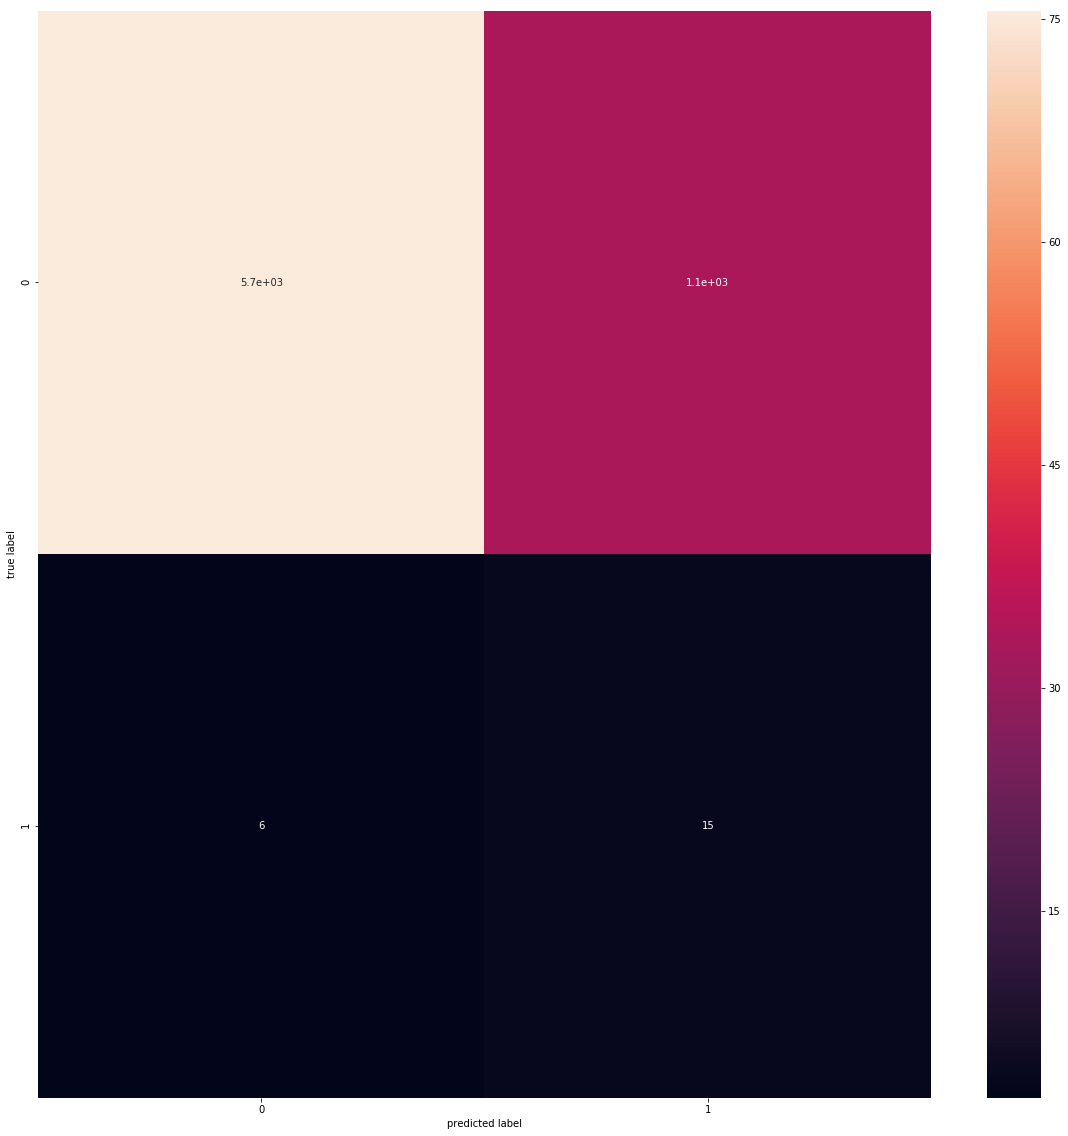

In [70]:
from math import sqrt
from sklearn import linear_model
from sklearn import metrics
log = linear_model.LogisticRegression(class_weight='balanced')
log.fit(xtrain,ytrain)

def plot_confusion(clf, x, y):
    fig = plt.figure(figsize=(20,20))
    y_pred = clf.predict(x)
    c_mat = metrics.confusion_matrix(y,y_pred)
    labels = np.unique(y)
    sns.heatmap(
        np.sqrt(c_mat),
        annot=c_mat,
        xticklabels=labels,
        yticklabels=labels,
        cbar=True);
    plt.ylabel("true label")
    plt.xlabel("predicted label")
    
plot_confusion(log,xtest,ytest)

## KNN

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import pipeline, preprocessing, neighbors, model_selection

knn_pipe = pipeline.Pipeline([
#    ("scaler", preprocessing.StandardScaler()), # scaling data is often important for knn. later we'll test other scalers
    ("knn", KNeighborsClassifier())
])

# for classification, we typically use stratified kfold 
# which ensures that each split has the same proportion of classes 
kfold = model_selection.StratifiedKFold(n_splits=10, shuffle=True)


k_range = np.arange(1, 20)
k_scores = []
n_cv = 10

for k in k_range:
    # set k parameter
    knn_pipe.set_params(knn__n_neighbors=k)
    test_scores = []
    # knn is very dependent on which examples fall into the splits. 
    # Average a few CVs of them to get a smoother response
    for i in range(n_cv):
        cv_results = model_selection.cross_validate(knn_pipe,xtest, ytest, cv=kfold)
        test_scores.append(np.mean(cv_results["test_score"]))

    k_scores.append(np.mean(test_scores))
from operator import itemgetter
scores = list(zip(k_range,test_scores))
scores.sort(key=itemgetter(1),reverse=True)
scores

KeyboardInterrupt: 

# Random Forrests

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

def quick_test_afew_times(model, X, y, n=10):
    return np.mean([quick_test(model, X, y) for j in range(n)])

def quick_test(model, X, y):
    xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=1234)
    model.fit(xtrain, ytrain)
    return model.score(xtest, ytest)

randomforest = RandomForestClassifier(n_estimators=50, bootstrap=True, oob_score=True)
results = quick_test_afew_times(randomforest, X, y)
#randomforest.predict

feature_importance = pd.DataFrame({'Features':X.columns, "Important":randomforest.feature_importances_}).sort_values(by='Important',ascending=False)
feature_importance['Important'] = feature_importance['Important']*1000
print(results)
feature_importance

0.9965289660229774


,Features,Important
235,YearBuilt,90.659
1,AssessTot,43.279
177,LandUse2016_11.0,36.777
7,BuiltFAR,36.249
2,BldgArea,33.313
192,LotUnitRatio,27.455
232,YCoord,27.082
174,LandUse,27.074
221,ResArea,26.050
231,XCoord,25.434
